# Module 2 #
## Data Visualization and Technical Analysis ##

# Problem 2.1 #

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [367]:
# Loading dataset using pd.read_csv
df=pd.read_csv('week2.csv')
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,0,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.0,3515.45,...,215587,7.587906e+08,17129,110769,51.38,5,2017,3515.450000,0.000000,Slight or No change
1,1,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.0,3619.40,...,372398,1.326266e+09,33654,147610,39.64,5,2017,3581.286326,0.029569,Slight or No change
2,2,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.1,3645.95,...,338342,1.235308e+09,27003,160855,47.54,5,2017,3604.904807,0.007335,Slight or No change
3,3,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.0,3592.05,...,294013,1.059170e+09,23822,143430,48.78,5,2017,3601.807735,-0.014784,Slight or No change
4,4,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.0,3571.65,...,270446,9.717284e+08,26291,113208,41.86,5,2017,3596.336770,-0.005679,Slight or No change


In [368]:
# Here we can see that the column Unnamed:0 can be deleted because it is just the index that is already present
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.0,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,5,2017,3515.450000,0.000000,Slight or No change
1,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.0,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,5,2017,3581.286326,0.029569,Slight or No change
2,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.1,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,5,2017,3604.904807,0.007335,Slight or No change
3,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.0,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,5,2017,3601.807735,-0.014784,Slight or No change
4,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.0,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,5,2017,3596.336770,-0.005679,Slight or No change


In [369]:
df['Date'].dtype

dtype('O')

In [370]:
# Converting date column type to datetime64
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [371]:
#setting date column as index of our dataframe
df.set_index(df['Date'] , inplace=True)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.0,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,5,2017,3515.450000,0.000000,Slight or No change
2017-05-16,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.0,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,5,2017,3581.286326,0.029569,Slight or No change
2017-05-17,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.1,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,5,2017,3604.904807,0.007335,Slight or No change
2017-05-18,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.0,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,5,2017,3601.807735,-0.014784,Slight or No change
2017-05-19,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.0,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,5,2017,3596.336770,-0.005679,Slight or No change


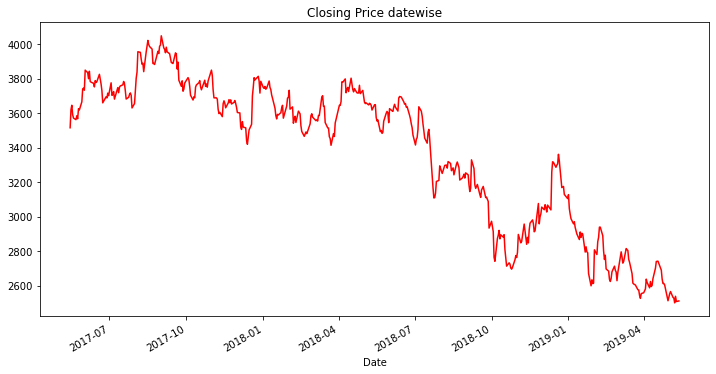

In [372]:
df['Close Price'].plot(figsize=(12,6), title='Closing Price datewise' , color='r')

In [373]:
df["Close Price"].min()

2499.7

In [374]:
df["Close Price"].max()

4048.95

In [375]:
df["Close Price"].unique

<bound method Series.unique of Date
2017-05-15    3515.45
2017-05-16    3619.40
2017-05-17    3645.95
2017-05-18    3592.05
2017-05-19    3571.65
               ...   
2019-05-07    2527.35
2019-05-08    2499.70
2019-05-09    2537.75
2019-05-10    2507.30
2019-05-13    2510.75
Name: Close Price, Length: 494, dtype: float64>

In [376]:
df["Close Price"].sort_values(ascending=True)

Date
2019-05-08    2499.70
2019-05-10    2507.30
2019-05-13    2510.75
2019-04-30    2511.85
2019-03-28    2525.75
               ...   
2017-08-30    3988.10
2017-08-31    3995.10
2017-08-17    3997.85
2017-08-16    4022.10
2017-09-01    4048.95
Name: Close Price, Length: 494, dtype: float64

# Problem 2.2 #

Text(0, 0.5, 'Day percentage change')

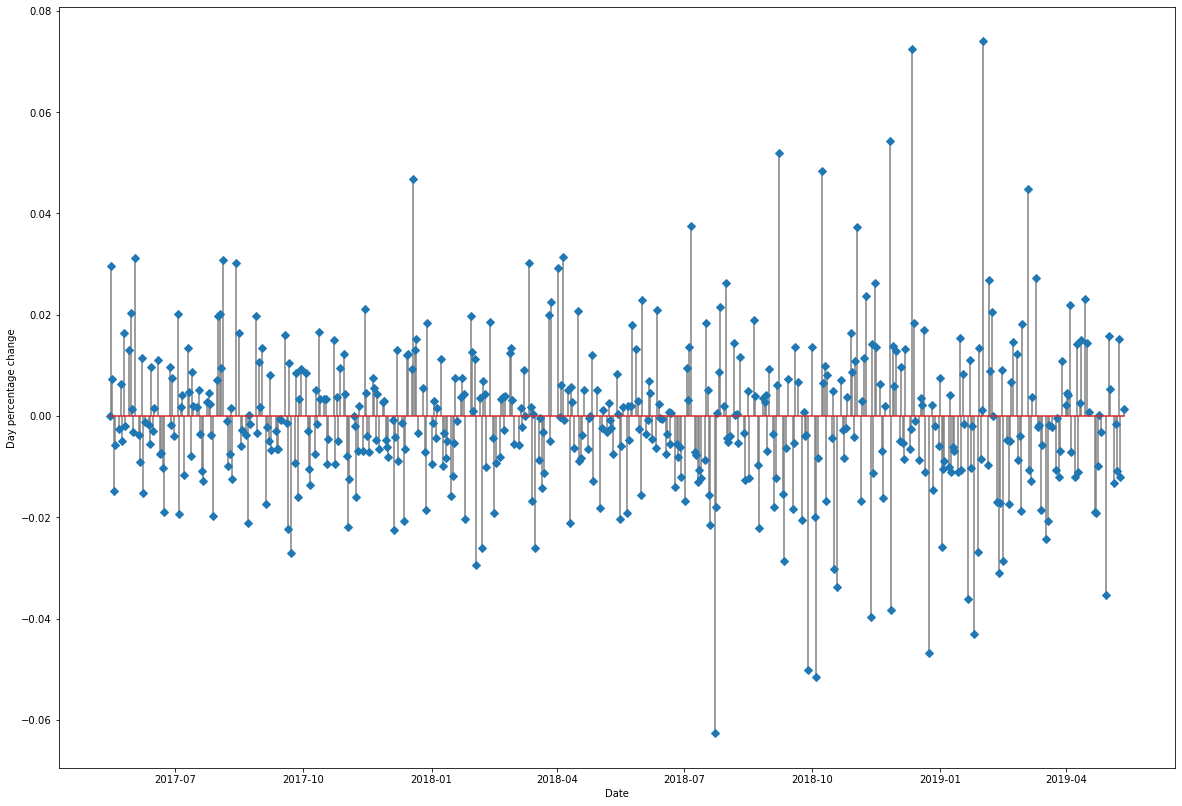

In [377]:
plt.figure(figsize=(20,14))
plt.stem(df['Date'],df['Day_Perc_Change'] , linefmt='grey',markerfmt='D' , use_line_collection=True)
plt.xlabel('Date')
plt.ylabel('Day percentage change')

# Task 2.3 #

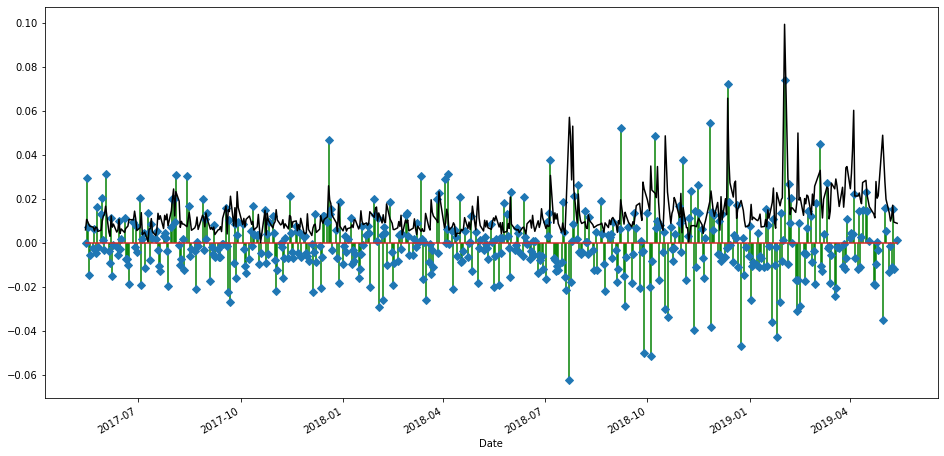

In [378]:
norm_vol=(df['Total Traded Quantity'] - df['Total Traded Quantity'].min())/(df['Total Traded Quantity'].max() * 10)
plt.figure(figsize=(16,8))
plt.stem(df['Date'],df['Day_Perc_Change'] , linefmt='green',markerfmt='D' , use_line_collection=True)
norm_vol.plot(color='black')

In [379]:
""""
  we can observe that both day_perc_change , total traded daily volume (however i scaled down this qunatity to superimpose) are highly correlated.
   """""

'"\n  we can observe that both day_perc_change , total traded daily volume (however i scaled down this qunatity to superimpose) are highly correlated.\n   '

# Problem 2.4 #

In [380]:
from collections import Counter
list_trend=df['Trend'].tolist()
Counter(list_trend)

Counter({'Slight or No change': 494})

In [381]:
df_2=df.groupby(['Trend'])
df_2.describe().T

Trend                  Slight or No change
Prev Close      count           494.000000
                mean           3380.030061
                std             421.260222
                min            2499.700000
                25%            3003.025000
...                                    ...
Day_Perc_Change min              -0.062630
                25%              -0.008417
                50%              -0.001486
                75%               0.007019
                max               0.073949

[128 rows x 1 columns]

c:\users\ramesh patel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


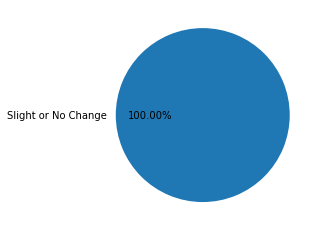

In [382]:
plt.figure(figsize=(8,4))
plt.pie(494, labels = ['Slight or No Change'],autopct='%1.2f%%')
plt.show()
                    

In [383]:
df_3=df.groupby(['Trend'])['Total Traded Quantity']
df_3.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,444429.172065,318268.876878,24217.0,254193.25,352451.0,526021.0,3296513.0


Text(0.5, 1.0, 'Trend to Mean of Total Traded Quantity')

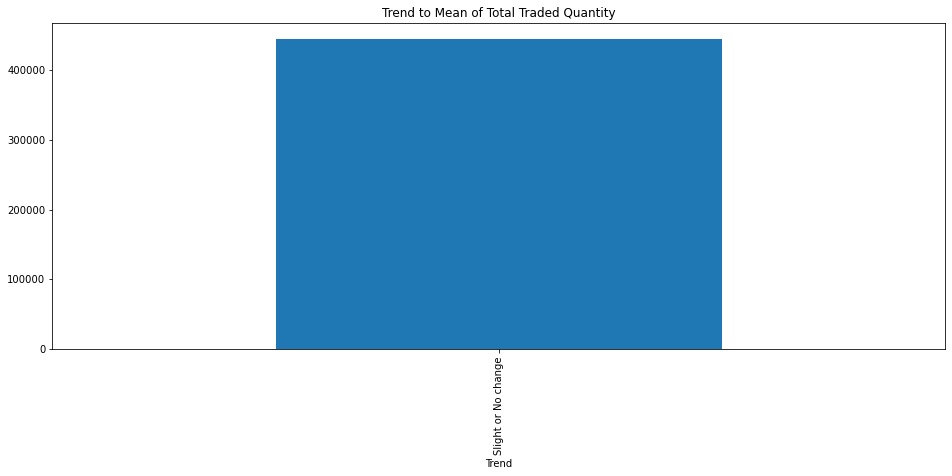

In [384]:
plt.figure(figsize=(16,6))
df_3.mean().plot.bar()
plt.title('Trend to Mean of Total Traded Quantity')

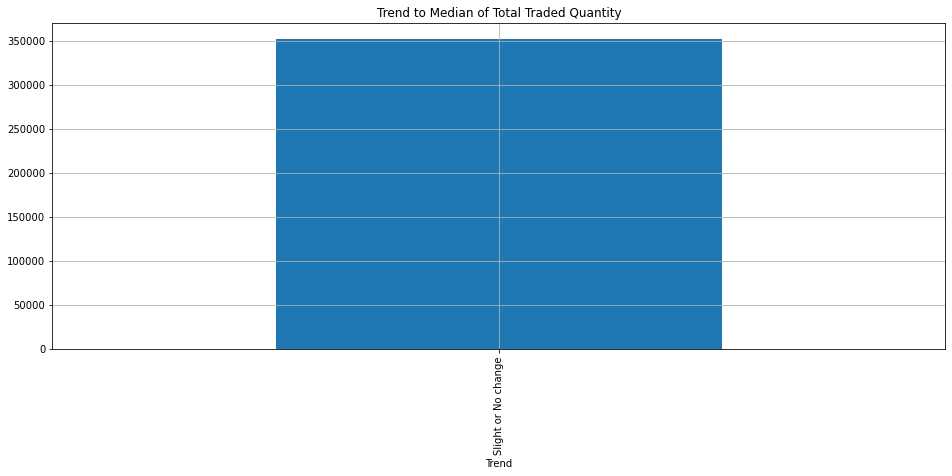

In [385]:
plt.figure(figsize=(16,6))
df_3.median().plot.bar()
plt.title('Trend to Median of Total Traded Quantity')
plt.grid(True)
plt.show()

# Problem 2.5 #

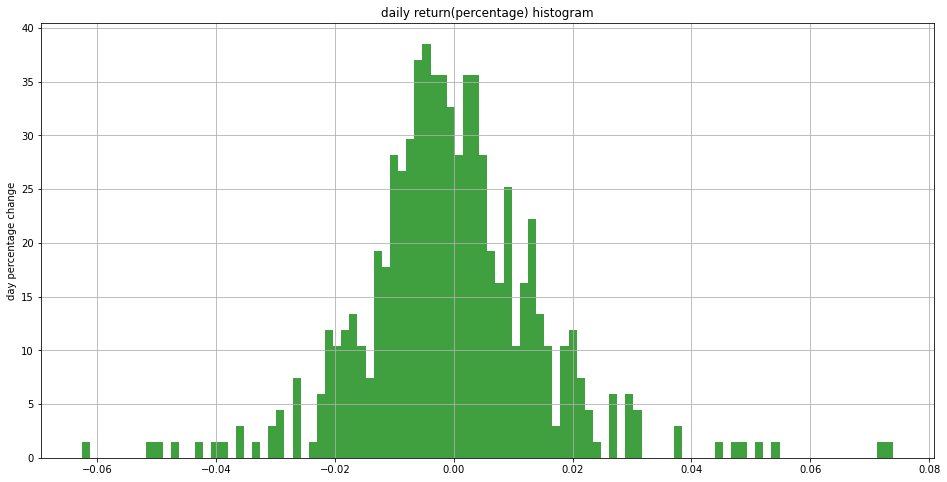

In [386]:
plt.figure(figsize=(16,8))
plt.hist(df['Day_Perc_Change'], bins=100 ,density=True , facecolor='g' ,alpha=0.75)
plt.ylabel('day percentage change')
plt.title('daily return(percentage) histogram')
plt.grid(True)
plt.show()

# Problem 2.6 #

In [387]:
# loading 5 other stock dataset
axis=pd.read_csv(r'D:\Intern\CL_ML\5_stocks\AXISBANK.csv')
gail=pd.read_csv(r'D:\Intern\CL_ML\5_stocks\GAIL.csv')
itc=pd.read_csv(r'D:\Intern\CL_ML\5_stocks\ITC.csv')
maruti=pd.read_csv(r'D:\Intern\CL_ML\5_stocks\MARUTI.csv')
tcs=pd.read_csv(r'D:\Intern\CL_ML\5_stocks\TCS.csv')

In [388]:
axis_eq=axis[axis['Series']== 'EQ']
axis_eq.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,15-May-2017,503.0,505.00,508.50,498.40,500.25,500.1,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,16-May-2017,500.1,502.10,504.50,493.50,502.05,501.5,499.85,8610492,4.303938e+09,101028,4027982,46.78
2,AXISBANK,EQ,17-May-2017,501.5,501.35,506.75,498.50,502.00,502.8,502.88,6443135,3.240154e+09,84189,2876528,44.64
3,AXISBANK,EQ,18-May-2017,502.8,498.00,499.10,490.25,492.85,492.0,494.96,9227022,4.566993e+09,95624,5348691,57.97
4,AXISBANK,EQ,19-May-2017,492.0,495.75,503.85,494.20,501.90,501.7,499.10,7611430,3.798900e+09,72985,4190505,55.06


In [389]:
gail_eq=gail[gail['Series']== 'EQ']
gail_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 493
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  494 non-null    object 
 1   Series                  494 non-null    object 
 2   Date                    494 non-null    object 
 3   Prev Close              494 non-null    float64
 4   Open Price              494 non-null    float64
 5   High Price              494 non-null    float64
 6   Low Price               494 non-null    float64
 7   Last Price              494 non-null    float64
 8   Close Price             494 non-null    float64
 9   Average Price           494 non-null    float64
 10  Total Traded Quantity   494 non-null    int64  
 11  Turnover                494 non-null    float64
 12  No. of Trades           494 non-null    int64  
 13  Deliverable Qty         494 non-null    int64  
 14  % Dly Qt to Traded Qty  494 non-null    fl

In [390]:
itc_eq=itc[itc['Series']=='EQ']
itc_eq.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000
mean,281.522166,281.953644,284.515283,279.015789,281.528239,281.551215,281.704109,1.207847e+07,3.418864e+09,100862.809717,7.576228e+06,62.907874
std,17.712189,17.797800,18.318535,17.315735,17.726871,17.713156,17.652603,9.568840e+06,2.776675e+09,49551.623372,5.795891e+06,8.987614
min,251.600000,250.000000,253.250000,250.000000,251.350000,251.600000,251.960000,9.571390e+05,2.678039e+08,10947.000000,5.829560e+05,34.830000
25%,267.662500,268.000000,270.637500,265.962500,267.750000,267.662500,267.937500,7.702920e+06,2.125598e+09,71392.000000,4.655912e+06,56.497500
50%,277.525000,278.925000,281.300000,275.250000,277.725000,277.675000,278.305000,9.834132e+06,2.753484e+09,92859.500000,6.334610e+06,63.295000
75%,293.375000,294.100000,295.687500,291.000000,293.187500,293.375000,293.187500,1.339486e+07,3.817617e+09,117500.250000,8.795104e+06,69.432500
max,342.500000,346.000000,367.700000,340.300000,342.800000,342.500000,344.040000,1.494797e+08,4.254992e+10,667965.000000,8.629348e+07,86.810000


In [391]:
maruti_eq=maruti[maruti['Series']=='EQ']
maruti_eq.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
491,MARUTI,EQ,07-May-2019,6709.65,6744.9,6785.25,6680.0,6693.00,6702.00,6737.56,586684,3.952821e+09,69696,198757,33.88
492,MARUTI,EQ,08-May-2019,6702.00,6679.0,6693.00,6616.0,6650.00,6650.15,6655.70,552749,3.678929e+09,59897,228920,41.41
493,MARUTI,EQ,09-May-2019,6650.15,6637.0,6678.00,6600.0,6609.85,6624.95,6646.86,570000,3.788710e+09,71334,257451,45.17
494,MARUTI,EQ,10-May-2019,6624.95,6623.0,6664.90,6575.0,6630.00,6631.60,6622.41,608669,4.030855e+09,75423,247688,40.69
495,MARUTI,EQ,13-May-2019,6631.60,6626.0,6659.30,6500.0,6523.00,6543.75,6603.04,555672,3.669123e+09,74137,241880,43.53


In [392]:
tcs_eq=tcs[tcs['Series']=='EQ']
tcs_eq.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000
mean,2387.748684,2386.112146,2412.039575,2362.413866,2386.900911,2387.279251,2387.545040,2.154751e+06,4.914692e+09,95827.566802,1.183271e+06,56.849312
std,463.565049,461.347984,470.430776,457.931108,463.288365,463.709942,464.726731,2.579232e+06,6.651663e+09,57134.390316,1.600605e+06,12.114263
min,1721.600000,1723.000000,1734.900000,1711.150000,1723.000000,1721.600000,1725.850000,4.341100e+04,1.120856e+08,2351.000000,1.386900e+04,21.480000
25%,1987.912500,1989.475000,2005.500000,1973.250000,1988.887500,1987.912500,1988.825000,9.365380e+05,2.444368e+09,51852.750000,5.490995e+05,48.020000
50%,2398.575000,2396.925000,2433.000000,2377.650000,2398.100000,2398.575000,2402.990000,1.696750e+06,3.959611e+09,86986.500000,9.150305e+05,56.750000
75%,2638.237500,2635.750000,2669.450000,2619.787500,2638.000000,2638.237500,2641.310000,2.622279e+06,5.725864e+09,125993.250000,1.465679e+06,66.310000
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+11,482657.000000,3.155626e+07,85.180000


In [393]:
closing_price=pd.DataFrame(columns=['AXISBANK' , 'GAIL' , 'ITC' , 'MARUTI' , 'TCS'])
closing_price['AXISBANK']=axis_eq['Close Price']
closing_price['GAIL']=gail_eq['Close Price']
closing_price['ITC']=itc_eq['Close Price']
closing_price['MARUTI']=maruti_eq['Close Price']
closing_price['TCS']=tcs_eq['Close Price']
closing_price

,AXISBANK,GAIL,ITC,MARUTI,TCS
0,500.10,414.00,277.95,6823.90,2365.10
1,501.50,411.40,283.45,6953.95,2429.15
2,502.80,408.30,281.65,6958.20,2455.35
3,492.00,404.75,277.90,6831.05,2536.20
4,501.70,401.05,286.20,6790.55,2507.15
...,...,...,...,...,...
490,741.85,337.50,307.00,6709.65,2215.40
491,735.50,340.40,301.90,6702.00,2132.00
492,731.00,341.55,300.65,6650.15,2157.85
493,735.05,332.05,299.85,6624.95,2151.95


In [394]:
pct_change_cp=closing_price.pct_change(fill_method='ffill')
pct_change_cp

,AXISBANK,GAIL,ITC,MARUTI,TCS
0,NaN,NaN,NaN,NaN,NaN
1,0.002799,-0.006280,0.019788,0.019058,0.027081
2,0.002592,-0.007535,-0.006350,0.000611,0.010786
3,-0.021480,-0.008695,-0.013314,-0.018273,0.032928
4,0.019715,-0.009141,0.029867,-0.005929,-0.011454
...,...,...,...,...,...
490,-0.007492,-0.009538,0.009039,-0.000052,-0.019886
491,-0.008560,0.008593,-0.016612,-0.001140,-0.037646
492,-0.006118,0.003378,-0.004140,-0.007736,0.012125
493,0.005540,-0.027814,-0.002661,-0.003789,-0.002734


In [395]:
pct_change_cp.dropna()

,AXISBANK,GAIL,ITC,MARUTI,TCS
1,0.002799,-0.006280,0.019788,0.019058,0.027081
2,0.002592,-0.007535,-0.006350,0.000611,0.010786
3,-0.021480,-0.008695,-0.013314,-0.018273,0.032928
4,0.019715,-0.009141,0.029867,-0.005929,-0.011454
5,0.001196,-0.027054,0.060797,-0.013084,0.009652
...,...,...,...,...,...
490,-0.007492,-0.009538,0.009039,-0.000052,-0.019886
491,-0.008560,0.008593,-0.016612,-0.001140,-0.037646
492,-0.006118,0.003378,-0.004140,-0.007736,0.012125
493,0.005540,-0.027814,-0.002661,-0.003789,-0.002734


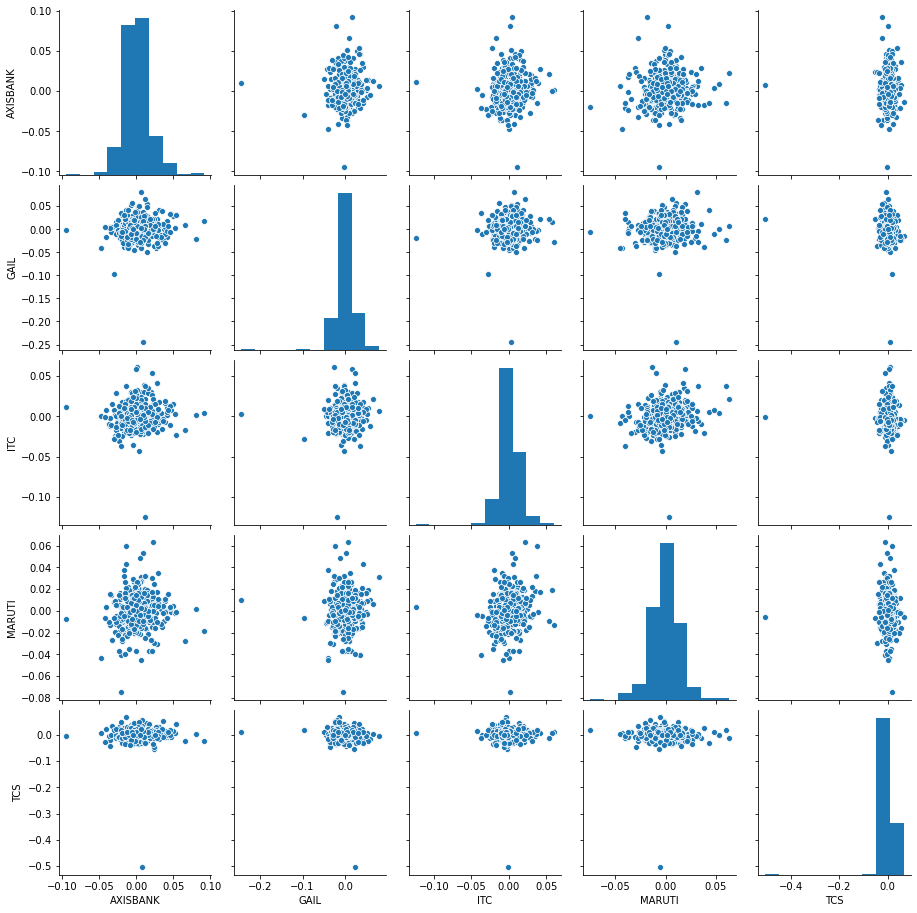

In [396]:
import seaborn as sns
sns.pairplot(data=pct_change_cp)

# Problem 2.7 #

In [397]:
rolling_avg_tcs=pct_change_cp['TCS'].rolling(7).mean()
rolling_avg_itc=pct_change_cp['ITC'].rolling(7).mean()

In [398]:
rolling_avg_tcs

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
490    0.004357
491   -0.001778
492    0.000377
493   -0.001896
494   -0.002592
Name: TCS, Length: 494, dtype: float64

In [399]:
rolling_avg_itc

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
490    0.001721
491   -0.002088
492   -0.001608
493   -0.002176
494   -0.001675
Name: ITC, Length: 494, dtype: float64

In [400]:
std_tcs=pct_change_cp['TCS'].rolling(7).std()

In [401]:
std_tcs.dropna()

7      0.015697
8      0.015455
9      0.018936
10     0.015261
11     0.014852
         ...   
490    0.012842
491    0.020369
492    0.021011
493    0.020242
494    0.020037
Name: TCS, Length: 487, dtype: float64

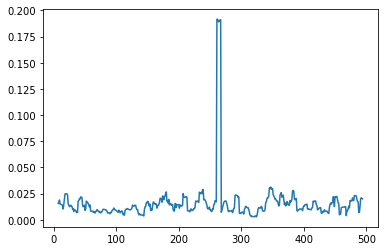

In [402]:
std_tcs.plot()

In [403]:
rolling_avg_itc.fillna(0)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
490    0.001721
491   -0.002088
492   -0.001608
493   -0.002176
494   -0.001675
Name: ITC, Length: 494, dtype: float64

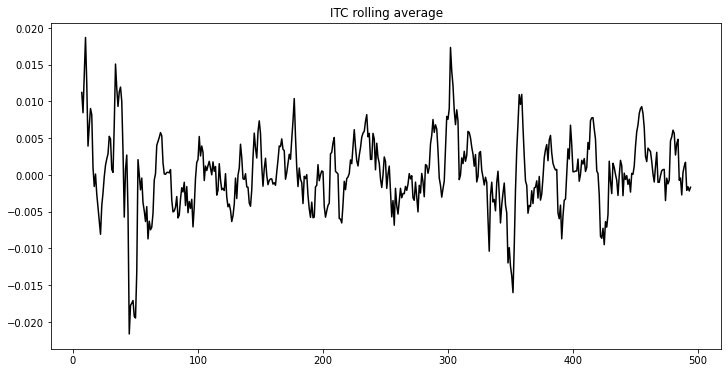

In [404]:
rolling_avg_itc.plot(figsize=(12,6), title='ITC rolling average' , color='black')

In [405]:
std_itc=pct_change_cp['ITC'].rolling(7).std()
std_itc

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
490    0.008974
491    0.010395
492    0.010178
493    0.010099
494    0.009696
Name: ITC, Length: 494, dtype: float64

In [406]:
std_itc.fillna(0)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
490    0.008974
491    0.010395
492    0.010178
493    0.010099
494    0.009696
Name: ITC, Length: 494, dtype: float64

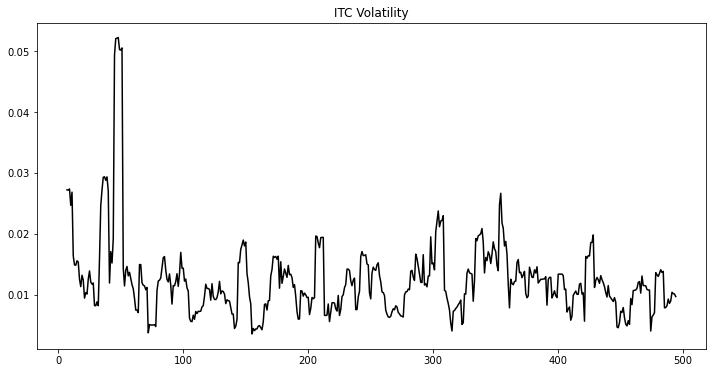

In [407]:
std_itc.plot(figsize=(12,6), title='ITC Volatility' , color='black')

<function matplotlib.pyplot.show(*args, **kw)>

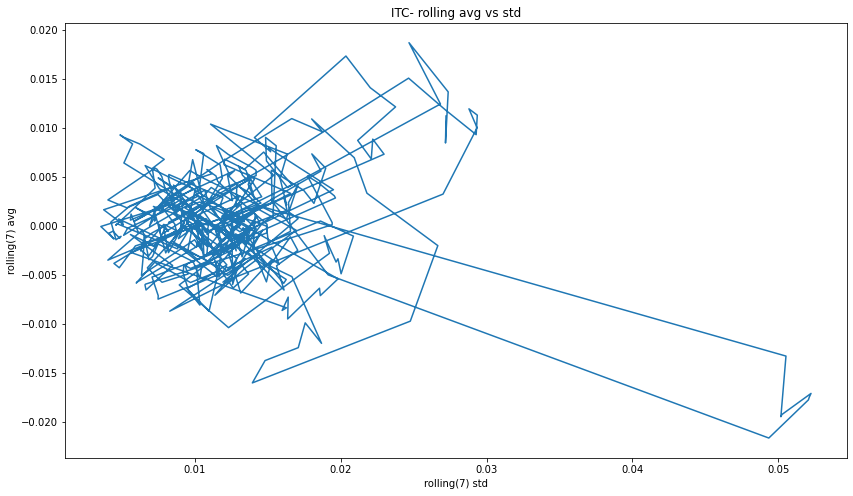

In [408]:
plt.figure(figsize=(14,8))
plt.plot(std_itc , rolling_avg_itc)
plt.title('ITC- rolling avg vs std')
plt.xlabel('rolling(7) std')
plt.ylabel('rolling(7) avg')
plt.show

# Problem 2.8 #

In [409]:
nifty=pd.read_csv(r'D:\Intern\CL_ML\NIFTY50.csv')
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [410]:
nifty['Day_Perc_Change']=nifty['Close'].pct_change()
nifty.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change
count,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,493.000000
mean,10583.743016,10622.674291,10525.919939,10574.617308,2.648677e+08,13677.918806,0.000362
std,570.074238,571.067477,563.662359,567.090953,9.739529e+07,4345.230980,0.007206
min,9384.050000,9431.900000,9341.650000,9360.550000,3.108638e+07,1534.080000,-0.026681
25%,10177.975000,10225.237500,10125.050000,10166.887500,1.975549e+08,10493.917500,-0.003950
50%,10594.500000,10632.400000,10533.625000,10584.725000,2.421258e+08,12943.310000,0.000570
75%,10897.762500,10937.700000,10840.762500,10892.812500,3.106006e+08,16118.212500,0.005281
max,11856.150000,11856.150000,11738.500000,11787.150000,7.411532e+08,35131.190000,0.023240


In [411]:
nifty.dropna()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.001419
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-0.010109
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.000164
5,22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,0.001098
...,...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.002026


In [412]:
nifty['Rolling_std']=nifty['Day_Perc_Change'].rolling(7).std()

In [413]:
nifty.dropna()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,Rolling_std
7,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,-0.002727,0.005509
8,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,0.015939,0.008139
9,26-May-2017,9507.75,9604.90,9495.40,9595.10,225647631,11204.36,0.008975,0.008831
10,29-May-2017,9560.05,9637.75,9547.70,9604.90,242266034,12484.61,0.001021,0.007363
11,30-May-2017,9590.65,9635.30,9581.20,9624.55,199894193,9765.40,0.002046,0.007268
...,...,...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652,0.006664
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041,0.007408
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075,0.004605
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.002026,0.004363


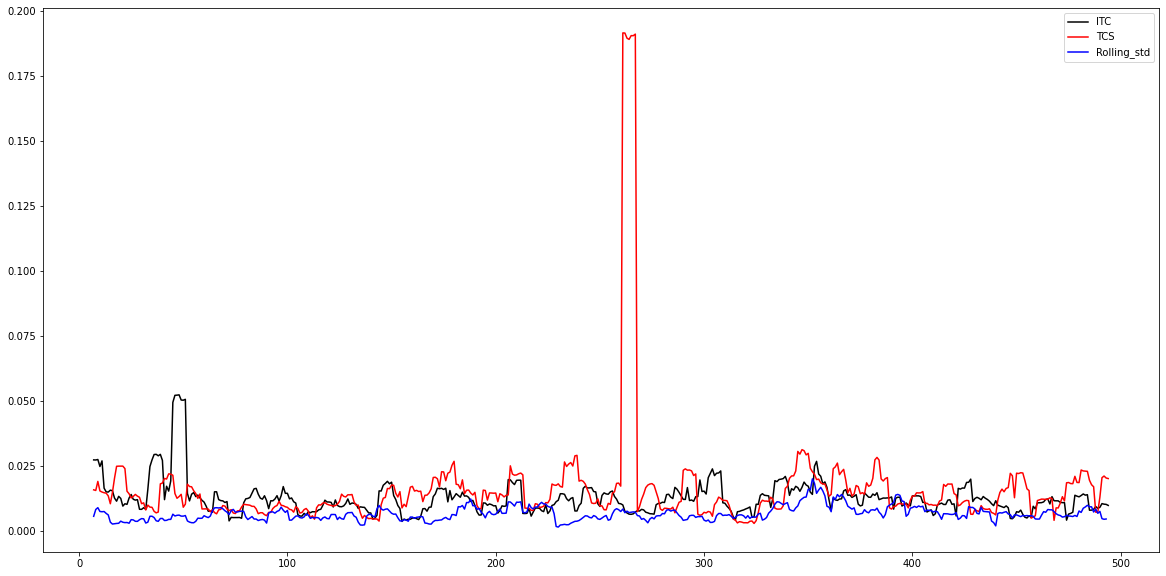

In [414]:
std_itc.plot(figsize=(20,10) , color='black')
std_tcs.plot(figsize=(20,10),color='red')
nifty['Rolling_std'].plot(figsize=(20,10),color='b')
plt.legend()

# Problem 2.9 #

In [415]:
nft=nifty.dropna().copy()
nft

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,Rolling_std
7,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,-0.002727,0.005509
8,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,0.015939,0.008139
9,26-May-2017,9507.75,9604.90,9495.40,9595.10,225647631,11204.36,0.008975,0.008831
10,29-May-2017,9560.05,9637.75,9547.70,9604.90,242266034,12484.61,0.001021,0.007363
11,30-May-2017,9590.65,9635.30,9581.20,9624.55,199894193,9765.40,0.002046,0.007268
...,...,...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652,0.006664
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041,0.007408
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075,0.004605
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.002026,0.004363


In [416]:
nft.Date=pd.to_datetime(nft['Date'])
nft.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,Rolling_std
7,2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,-0.002727,0.005509
8,2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,0.015939,0.008139
9,2017-05-26,9507.75,9604.90,9495.40,9595.10,225647631,11204.36,0.008975,0.008831
10,2017-05-29,9560.05,9637.75,9547.70,9604.90,242266034,12484.61,0.001021,0.007363
11,2017-05-30,9590.65,9635.30,9581.20,9624.55,199894193,9765.40,0.002046,0.007268


In [417]:
nft['mm21']=nft['Close'].rolling(21).mean()
nft['mm34']=nft['Close'].rolling(34).mean()
nft.dropna()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,Rolling_std,mm21,mm34
40,2017-07-11,9797.45,9830.05,9778.85,9786.05,185322358,9908.41,0.001535,0.004687,9616.578571,9612.514706
41,2017-07-12,9807.30,9824.95,9787.70,9816.10,150045594,7966.44,0.003071,0.003887,9626.088095,9625.913235
42,2017-07-13,9855.80,9897.25,9853.45,9891.70,186866752,10244.56,0.007702,0.003964,9639.650000,9637.147059
43,2017-07-14,9913.30,9913.30,9845.45,9886.35,164456602,9187.71,-0.000541,0.004320,9652.421429,9645.713235
44,2017-07-17,9908.15,9928.20,9894.70,9915.95,168596771,8310.48,0.002994,0.004326,9668.511905,9654.861765
...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652,0.006664,11657.780952,11600.436765
490,2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041,0.007408,11644.233333,11600.913235
491,2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075,0.004605,11630.128571,11597.235294
492,2019-05-10,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.002026,0.004363,11611.697619,11591.844118


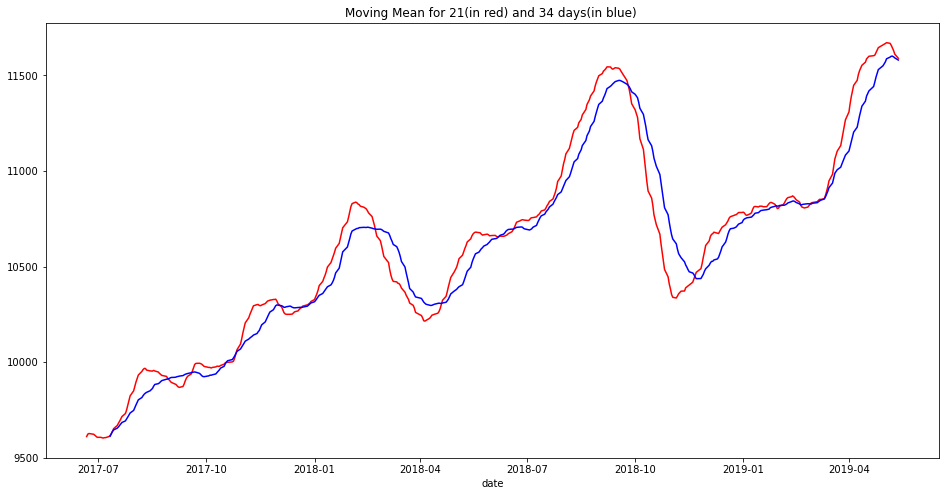

In [418]:
plt.figure(figsize=(16,8))
plt.plot(nft['Date'],nft['mm21'] , color='r' )
plt.plot(nft['Date'],nft['mm34'], color='b' )
plt.title('Moving Mean for 21(in red) and 34 days(in blue) ')
plt.xlabel('date')
plt.show()

In [419]:
conditions=[(nft['mm21'] > nft['mm34']) , nft['mm21'] < nft['mm34']]
values=['buy' , 'sell']
nft['Trade Calls'] = np.select(conditions , values)
nft.dropna()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,Rolling_std,mm21,mm34,Trade Calls
40,2017-07-11,9797.45,9830.05,9778.85,9786.05,185322358,9908.41,0.001535,0.004687,9616.578571,9612.514706,buy
41,2017-07-12,9807.30,9824.95,9787.70,9816.10,150045594,7966.44,0.003071,0.003887,9626.088095,9625.913235,buy
42,2017-07-13,9855.80,9897.25,9853.45,9891.70,186866752,10244.56,0.007702,0.003964,9639.650000,9637.147059,buy
43,2017-07-14,9913.30,9913.30,9845.45,9886.35,164456602,9187.71,-0.000541,0.004320,9652.421429,9645.713235,buy
44,2017-07-17,9908.15,9928.20,9894.70,9915.95,168596771,8310.48,0.002994,0.004326,9668.511905,9654.861765,buy
...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652,0.006664,11657.780952,11600.436765,buy
490,2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041,0.007408,11644.233333,11600.913235,buy
491,2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075,0.004605,11630.128571,11597.235294,buy
492,2019-05-10,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.002026,0.004363,11611.697619,11591.844118,buy


# Problem 2.10 #

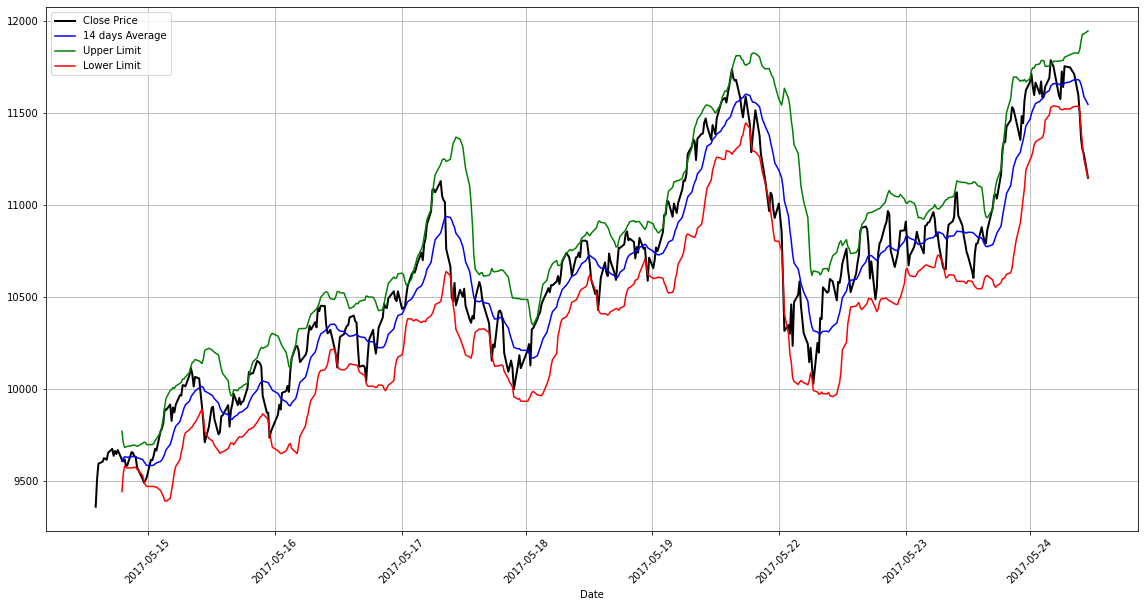

In [424]:
nft['bollinger'] = nft['Close'].rolling(14).mean()
std = nft['Close'].rolling(14).std()
nft['upper'] = nft['bollinger'] + 2 * std 
nft['lower'] = nft['bollinger'] - 2 * std

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(nft.Date, nft['Close'], 'k', lw=2 , label='Close Price')
ax.plot(nft.Date, nft['bollinger'], 'b', label='14 days Average')
ax.plot(nft.Date, nft['upper'], 'g', label='Upper Limit')
ax.plot(nft.Date, nft['lower'], 'r', label='Lower Limit')
# ax.fill_between(ndf.Date, ndf['upper'], ndf['lower'], color='grey')

ax.set_xlabel('Date')
plt.legend(loc=2)
plt.tight_layout()
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.grid(True)
plt.show()

In [425]:
nft.to_csv('module2_nft.csv')